In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
traing_points = [[1,2], [1,5], [2,2], [7,5], [9,4], [8,2]]
labels = [1,1,1,0,0,0]
classifier.fit(traing_points, labels)

print(classifier.predict([[3,2]]))

[1]


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X = df[df.columns[:-1]]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=1234)


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
model = SVC(kernel='poly', C=3, degree=3)
model.fit(X_train, y_train)

SVC(C=3, kernel='poly')

In [ ]:
from sklearn.metrics import accuracy_score
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X,y = load_iris(return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

nb = GaussianNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)

In [ ]:
print(X_test.shape[0])
print((y_test != y_pred).sum())

75
4


In [ ]:
import pandas as pd
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
print(red_wine.shape)
print(white_wine.shape)

(1599, 12)
(4898, 12)


In [ ]:
red_wine['color']=1
white_wine['color'] = 0
wine = pd.concat([red_wine, white_wine])

In [ ]:
X = wine[red_wine.columns.difference(['quality'])]
y = wine['quality']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_knn = knn.predict(X_test)

<Axes: xlabel='quality'>

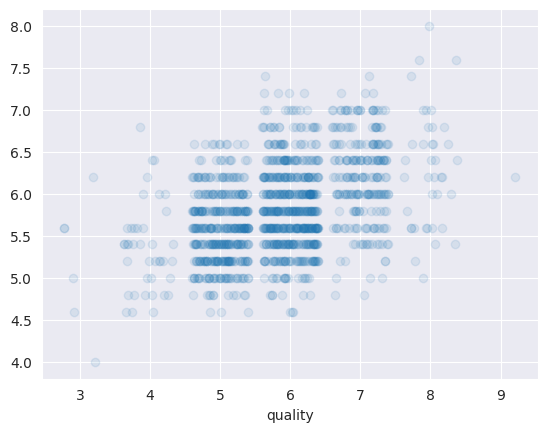

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.regplot(x=y_test, y=y_knn, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_knn))
print(r2_score(y_test,y_knn))

0.6426769230769231
0.1617311439983018


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = stand.fit_transform(X_train)
X_test_std = stand.transform(X_test)

<Axes: xlabel='quality'>

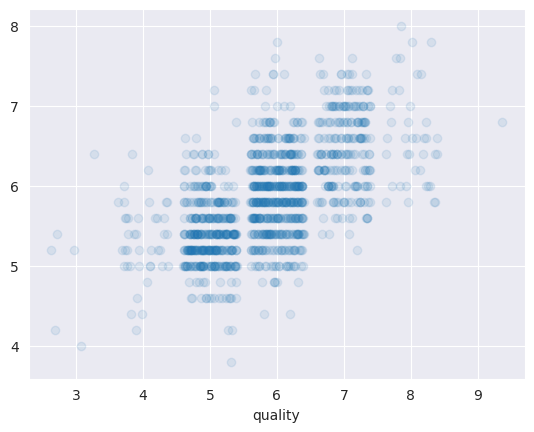

In [ ]:
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X_train_std, y_train)
y_knn2 = knn2.predict(X_test_std)
sns.regplot(x=y_test, y=y_knn2, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':0.1})

In [ ]:
r2_score(y_test, y_knn2)

0.3781310899724081

In [ ]:
xc = wine[red_wine.columns.difference(['color'])] #difference[X] X만 빼고 지정하겠다
yc = wine['color']

xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.2, random_state=1234)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(xc_train, yc_train)
y_knc = knc.predict(xc_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(yc_test, y_knc)
accuracy_score(yc_test, y_knc)

0.9438461538461539